Assuming you are an intern in a big MNC.
Recently there has been many spam email. 
Your boss ask you to create a classifier for Spam Email (text) and calculate the accuracy. if your accuracy is high, your comany may use your model.
Explain why it is important to know text analytics.
How can classification of spam email help your company.
What do you need to get a better result.

In [1]:
import pandas as pd
df = pd.read_csv("spam.csv")

df = df[df['Category'].isin(['spam','ham'])]
y = df['Category']=='spam'
X =df['Message'].tolist()

from sklearn.feature_extraction.text import CountVectorizer
X = CountVectorizer().fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
cm=confusion_matrix(y_test, pred)
acc=(cm[0,0]+cm[1,1])/sum(sum(cm))
print('Accuracy without TFIDF is ', acc)

Accuracy without TFIDF is  0.9813352476669059


In [2]:
from sklearn.feature_extraction.text import TfidfTransformer

X_train = TfidfTransformer().fit_transform(X_train)
X_test = TfidfTransformer().fit_transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
cm=confusion_matrix(y_test, pred)
acc=(cm[0,0]+cm[1,1])/sum(sum(cm))
print('Accuracy with TFIDF is ',acc)

Accuracy with TFIDF is  0.9691313711414213


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn

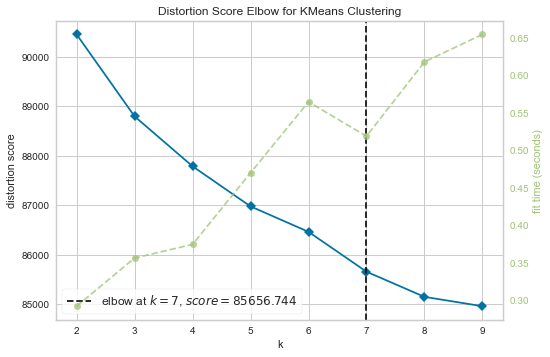

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [3]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)
model.fit(X)
pred = model.predict(X)
cm = confusion_matrix(y, pred)

from yellowbrick.cluster import KElbowVisualizer
v = KElbowVisualizer(model,k=(2,10))
v.fit(X)
v.show()

**Conclusion**<br>
Since the accuracy of my model is very high, I think the company can apply my spam classification solution.

**Explain why it is important to know text analytics.**<br>
Through text analytics, businesses can easily study these texts which can be presented in the form of charts, surveys and other such formats. On the basis of the results, companies can then make an informed decision about the product concerned and its performance.<br>
On the other hand, text analytics allows businesses to tune into structured and unstructured data across emails, text messages, emails, and customer reviews to narrow down on positive and negative topics.

**How can classification of spam email help your company?**<br>
Considering the fact that recently there has been many spam email to our company's email, it will greatly affect the efficiency of our company replying to those email which is useful or even urgent. Thus, we need spam email classification to filter out those spam email so that company staff can directly check those important email.


**What do you need to get a better result?**<br>
Use better corpus, apply more advanced machine learning and deep learning algorithm.